## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Business Objective
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the NumPy and Pandas packages
import numpy as np
import pandas as pd

In [3]:
# Read the dataset
leads = pd.read_csv("Leads.csv")

In [4]:
# Look at the entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Inspect the shape of the dataset
leads.shape

(9240, 37)

In [6]:
# Inspect the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Trying to get insights on the values in the columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking for the data type of the variables and the non-null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [9]:
# Defining a function to check the percent of null values present in each column
def null_count(leads):
    return ((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

In [10]:
cnt_20 = null_count(leads)
cnt_20

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Observation-
There are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 20% missing values as they are of no use because of extreme missing values.



In [11]:
#creating a list of all the columns with null value percent greater than 15%
null_drop_40= list(cnt_20[cnt_20 > 20.00].index)
null_drop_40

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Tags',
 'Lead Profile',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education']

In [12]:
#Dropping all the  feature with null value percent greater than 15%
leads.drop(null_drop_40, axis = 1, inplace = True)

In [13]:
# Checking the number of null values
null_count(leads)

Specialization                              15.562771
City                                        15.367965
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Newspaper                                    0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Magazine                                     0.000000
X Education Forums                           0.000000
Newspaper Article                            0.000000
Lead Number                 

## Observation - 
Feature variable `City` isn't of any use in the analysis as the customer is a online education course provider.
So we will go ahead with dropping the feature `City`.

In [14]:
#Dropping City Column from our Database
leads.drop("City", axis = 1, inplace = True)

In [15]:
#checking for Null counts
null_count(leads)

Specialization                              15.562771
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
X Education Forums                           0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Newspaper                                    0.000000
Search                                       0.000000
Newspaper Article                            0.000000
Magazine                                     0.000000
Lead Number                 

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [16]:
# Get the value counts of all the columns
for c in leads.columns:
    print(leads[c].astype('category').value_counts())
    print('=============================================================')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

Specialization column have the level 'Select'.

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [17]:
#Dropping all the columns which are without variance
leads.drop(["Do Not Call","Search", "Newspaper Article","X Education Forums","Newspaper","Magazine","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content" ,"I agree to pay the amount through cheque"], axis = 1, inplace = True)

In [18]:
#checking for Null counts
null_count(leads)

Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

## Observations -
Except Specialization we have minimal(ie. only a few rows) null values present in the columns, Therefore, instead of going for dropping the columns we will go ahead with dropping the rows with null values.

In [19]:
# Drop the null value rows in the column 'TotalVisits'
leads = leads[~leads['TotalVisits'].isnull()]

In [20]:
# Check the null values again
null_count(leads)

Specialization                            15.720092
Lead Source                                0.318576
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [21]:
# Drop the null values rows in the column 'Lead Source'
leads = leads[~leads['Lead Source'].isnull()]

In [22]:
# Check the number of null values again
null_count(leads)

Specialization                            15.770333
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [23]:
# Drop the null values rows in the column 'Specialization'
leads = leads[~leads['Specialization'].isnull()]

In [24]:
# Check the number of null values again
null_count(leads)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Observations- 
Null Value Treament on the dataframe is completed and now we have no null values present in our dataframe

In [25]:
print(len(leads.index))
print(len(leads.index)/9240)

7643
0.8271645021645022


## Observation
We have `82.7%` Rows still available to go ahead with our algorithm 

In [26]:
# Let's look at the dataset again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,No,Modified


## Observation - 
From the perspective on training and realtionship we can donot have any dependency on the `Prospect ID` and `Lead Number`. Therefore we will go ahead with dropping the variables.

In [27]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [28]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,No,Modified


# Data Visualisation

### Visualizing Numerical Variables

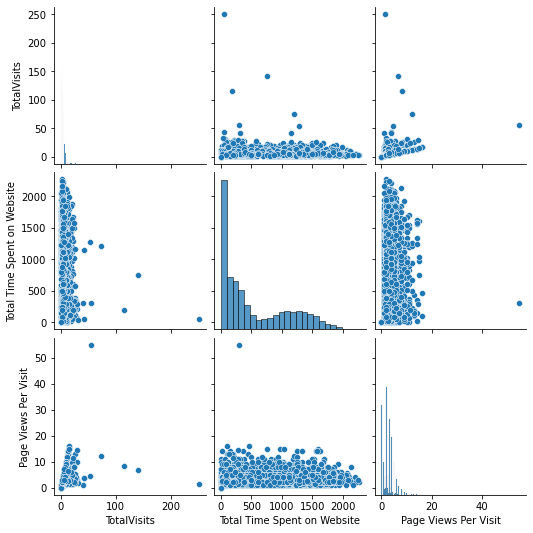

In [29]:
leads.describe()
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
plt.show()

## Observation
1. There are a few extreme outliers present in the Variables.
2. There isn't much insights that can be derived from the graphs and no linear relationship exists between any of the columns. 

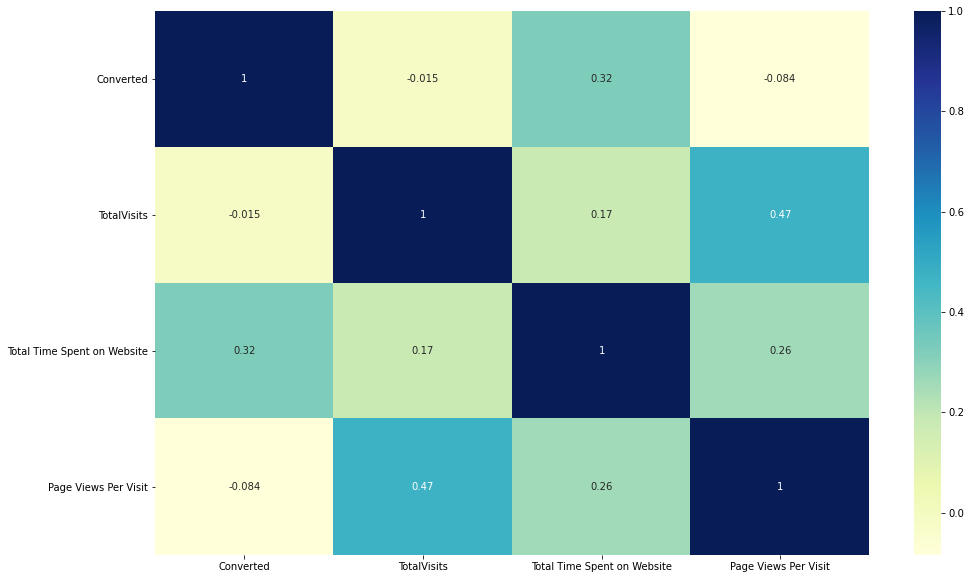

In [30]:
# Plotting heatmap to check for any relationship

plt.figure(figsize = (16, 10))
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Observations -

1. There seems to be no linear relationship between any of the feature.

**we will perform a linear relationship check again post dummy variables creation**

In [31]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=leads)
  plt.show()

In [32]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=leads, kind="count")
  plt.show()

In [33]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=leads)
  plt.show()

In [34]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=leads, kind="count")
  plt.show()

In [35]:
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

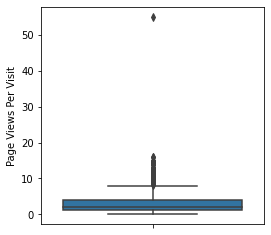

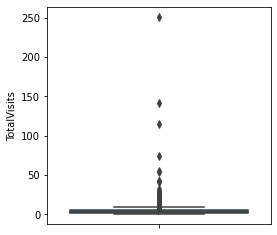

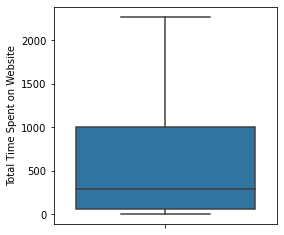

In [36]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

In [37]:
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',      
                         
                        'A free copy of Mastering The Interview', 'Last Notable Activity'}

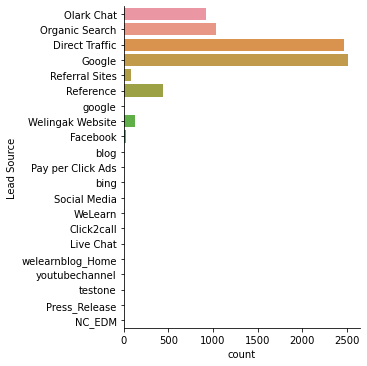

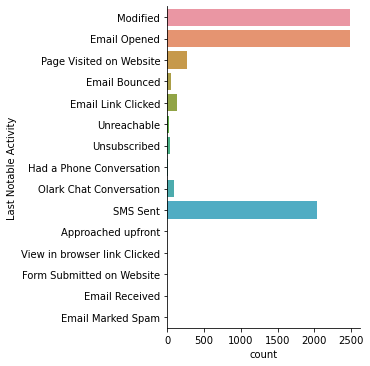

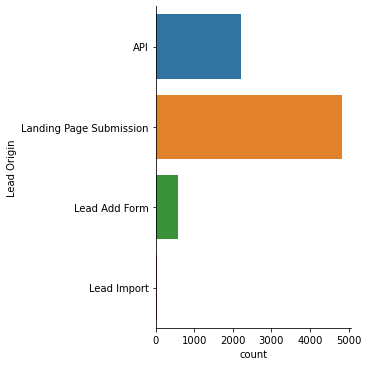

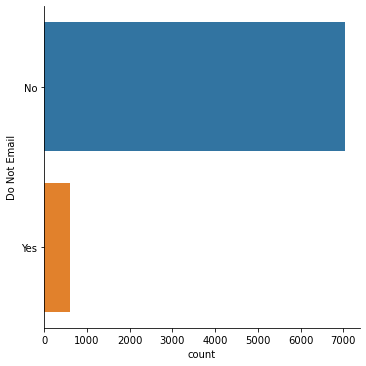

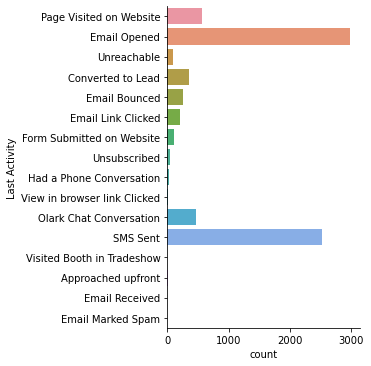

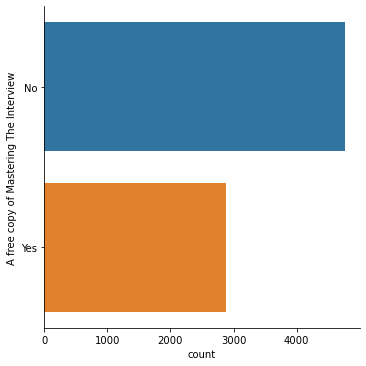

In [38]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

### Dummy variable creation

In [39]:
# Checking for Categorical variables
temp = leads.loc[:, leads.dtypes == 'object']
temp

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Select,No,Modified
1,API,Organic Search,No,Email Opened,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Select,No,Modified
...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,Email Marked Spam,IT Projects Management,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,SMS Sent,Media and Advertising,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,SMS Sent,Business Administration,Yes,SMS Sent
9238,Landing Page Submission,Google,No,SMS Sent,Human Resource Management,No,SMS Sent


In [40]:
# Creating dummy variables for categorical variables
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Concating Dummy variables created to the leads DataSet
leads = pd.concat([leads, dummy], axis=1)

In [41]:
# Creating dummy variable 'Specialization' and dropping Select level manually because it beasically signifies Null value 
#ie. the user chose not to disclose that detail

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [42]:
# Dropping the variables for which the dummy variables have been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [43]:
#checking the dataSet again for the values types and size
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#checking the dataSet again for the values types and size
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           7643 non-null   int64  
 1   TotalVisits                                         7643 non-null   float64
 2   Total Time Spent on Website                         7643 non-null   int64  
 3   Page Views Per Visit                                7643 non-null   float64
 4   Lead Origin_Landing Page Submission                 7643 non-null   uint8  
 5   Lead Origin_Lead Add Form                           7643 non-null   uint8  
 6   Lead Origin_Lead Import                             7643 non-null   uint8  
 7   Lead Source_Direct Traffic                          7643 non-null   uint8  
 8   Lead Source_Facebook                                7643 non-null   uint8  
 9

### Test-Train Split

Splitting the dataSet into Test/Train split to begin with Model Learning

In [45]:
# Importing required library
from sklearn.model_selection import train_test_split

In [46]:
# Bifurcating the independent and Target variables into X and y DataFrame respectively
y = leads.pop('Converted')
X = leads
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237,2.0,199,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9238,3.0,499,3.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 7643, dtype: int64

In [48]:
# Spliting the dataset into 70% train and 30% test with Random_State = True
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = True)


### Scaling

Scaling the numerical variables to scale them down into a single scale.

In [49]:
X.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,...,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.00000,7643.000000
mean,3.811723,533.502944,2.625275,0.632474,0.076017,0.003533,0.322910,0.003663,0.328928,0.000262,...,0.047887,0.023028,0.107680,0.026429,0.065288,0.013084,0.009551,0.005234,0.04527,0.026429
std,5.088462,554.499217,2.152075,0.482163,0.265043,0.059335,0.467619,0.060420,0.469855,0.016175,...,0.213541,0.150001,0.309996,0.160419,0.247050,0.113641,0.097269,0.072158,0.20791,0.160419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,61.000000,1.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,295.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,5.000000,1010.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [50]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
#Scaling the Numerical Variables using MinMaxScaler Method
scaler = MinMaxScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3235,0.015936,0.053257,0.072727,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0.011952,0.189261,0.027273,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,0.007968,0.101232,0.036364,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7800,0.007968,0.008803,0.036364,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022,0.007968,0.593750,0.036364,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [52]:
# Looking at the correlation b/w all the features
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
TotalVisits,1.000000,0.168754,0.455790,0.240292,-0.189040,-0.043285,0.053595,-0.042132,0.067568,-0.014021,...,0.017319,0.027960,-0.003622,0.026292,-0.001262,0.009074,0.063271,0.018994,0.065168,0.054045
Total Time Spent on Website,0.168754,1.000000,0.253287,0.241401,-0.229149,-0.057890,0.099203,-0.057262,0.182714,-0.018752,...,0.020438,0.012915,0.036414,0.028909,0.040936,0.029937,0.020191,0.004304,0.026791,0.034997
Page Views Per Visit,0.455790,0.253287,1.000000,0.438567,-0.323734,-0.072258,0.073721,-0.068510,0.166841,-0.023406,...,0.061100,0.056309,0.018034,0.049666,0.012464,0.024705,0.015812,0.027083,0.044250,0.102536
Lead Origin_Landing Page Submission,0.240292,0.241401,0.438567,1.000000,-0.379220,-0.079214,0.474535,-0.074907,0.062464,-0.025659,...,0.121148,0.076052,0.089902,0.079688,0.096350,0.064683,0.044978,0.045046,0.094138,0.089183
Lead Origin_Lead Add Form,-0.189040,-0.229149,-0.323734,-0.379220,1.000000,-0.017062,-0.197913,-0.017507,-0.201299,0.067664,...,-0.040695,-0.029442,0.028302,-0.038790,-0.022444,-0.026113,-0.021782,-0.021099,-0.036829,-0.048207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.009074,0.029937,0.024705,0.064683,-0.026113,-0.006774,0.021249,-0.006950,0.015779,-0.002194,...,-0.025384,-0.017333,-0.039908,-0.018871,-0.029604,1.000000,-0.011457,-0.008376,-0.025226,-0.019138
Specialization_Rural and Agribusiness,0.063271,0.020191,0.015812,0.044978,-0.021782,-0.006028,0.021966,-0.006185,-0.043318,-0.001953,...,-0.022590,-0.015425,-0.035517,-0.016794,-0.026347,-0.011457,1.000000,-0.007455,-0.022450,-0.017032
Specialization_Services Excellence,0.018994,0.004304,0.027083,0.045046,-0.021099,-0.004407,0.046780,-0.004522,-0.030368,-0.001428,...,-0.016516,-0.011278,-0.025966,-0.012278,-0.019262,-0.008376,-0.007455,1.000000,-0.016414,-0.012452
Specialization_Supply Chain Management,0.065168,0.026791,0.044250,0.094138,-0.036829,0.001558,0.091091,0.000838,-0.036657,-0.004300,...,-0.049739,-0.033964,-0.078200,-0.036977,-0.058010,-0.025226,-0.022450,-0.016414,1.000000,-0.037501


## Observation
There are 75 Columns in our dataFrame and looking at the colinearity of all those is not feasible. Therefore we will go ahead with `Recursive Feature Elimination(RFE)` to chose the features that are best suited in our Model.

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [53]:
# Importing 'LogisticRegression'  from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
# Importing RFE to select most suited features for our model 
from sklearn.feature_selection import RFE
rfe =RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [55]:
# looking at the Features Selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 51),
 ('Lead Source_WeLearn', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 55),
 ('Lead Source_blog', False, 28),
 ('Lead Source_google', False, 40),
 ('Lead Source_testone', False, 60),
 ('Lead Source_welearnblog_Home', False, 58),
 

In [56]:
# Extracting all the columns selected by RFE and storing it in col variable

col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [57]:
#Import statsmodels to look at the summary of our model
#Model building
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5334
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.3
Date:                Tue, 07 Dec 2021   Deviance:                       5124.7
Time:                        13:00:36   Pearson chi2:                 5.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0741      0.080    -25.773      0.000      -2.232      -1.916
TotalVisits                                        5.6670      2.077      2.728      0.006       1.596       9.738
Total Time Spent on Website                        4.3953      0.163     26.936      0.000       4.075       4.715
Lead Origin_Lead Add Form                          4.0074      0.219     18.292      0.000       3.578       4.437
Lead Source_Olark Chat                             1.5821      0.118     13.387      0.000       1.350       1.814
Lead Source_Welingak Website                       1.4903      0.751      1.984      0.047       0.018       2.963
Do Not Email_Yes                                  -1.5336      0.198     -7.733      0.000      -1.922      -1.145
Last Activity_Converted to Lead                   -0.9384      0.199     -4.718      0.000      -1.328      -0.549
Last Activity_Email Bounced                       -1.1954      0.467     -2.561      0.010      -2.110      -0.281
Last Activity_Had a Phone Conversation             1.2345      0.962      1.283      0.199      -0.651       3.120
Last Activity_Olark Chat Conversation             -1.2435      0.178     -6.968      0.000      -1.593      -0.894
Last Activity_Unreachable                         -1.6938      0.623     -2.718      0.007      -2.915      -0.472
Last Notable Activity_Email Bounced                1.7854      0.635      2.813      0.005       0.542       3.029
Last Notable Activity_Had a Phone Conversation     1.7903      1.459      1.227      0.220      -1.069       4.650
Last Notable Activity_SMS Sent                     1.3243      0.080     16.477      0.000       1.167       1.482
Last Notable Activity_Unreachable                  4.1862      0.873      4.795      0.000       2.475       5.897
==================================================================================================================
"""

## Observations - 
There is only one variable with high p-value ie pvalue greater than '0.05'. We will need to take care of it. But first, let's also look at the VIFs.

In [58]:
# Importing 'variance_inflation_factor' to look at the multicolinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Calculating VIF for all the columns to check Multicolinearity between the columns
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Had a Phone Conversation,3.00
12,Last Notable Activity_Had a Phone Conversation,3.00
7,Last Activity_Email Bounced,1.91
5,Do Not Email_Yes,1.73
1,Total Time Spent on Website,1.59
10,Last Activity_Unreachable,1.58
14,Last Notable Activity_Unreachable,1.57
0,TotalVisits,1.39
13,Last Notable Activity_SMS Sent,1.37
2,Lead Origin_Lead Add Form,1.34


## Observations - 
VIFs seem to be in a decent range except for all the variables. 

Let's first drop the variable `Last Notable Activity_Had a Phone Conversation` since it has a high p-value as well as a high VIF.

In [60]:
#Dropping 'Last Notable Activity_Had a Phone Conversation'
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [61]:
# Refiting the model after dropping 'Last Notable Activity_Had a Phone Conversation'
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5335
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.2
Date:                Tue, 07 Dec 2021   Deviance:                       5126.3
Time:                        13:00:36   Pearson chi2:                 5.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0750      0.081    -25.774      0.000      -2.233      -1.917
TotalVisits                                5.7430      2.080      2.761      0.006       1.667       9.819
Total Time Spent on Website                4.3934      0.163     26.933      0.000       4.074       4.713
Lead Origin_Lead Add Form                  4.0084      0.219     18.295      0.000       3.579       4.438
Lead Source_Olark Chat                     1.5830      0.118     13.392      0.000       1.351       1.815
Lead Source_Welingak Website               1.4904      0.751      1.984      0.047       0.018       2.963
Do Not Email_Yes                          -1.5343      0.198     -7.736      0.000      -1.923      -1.146
Last Activity_Converted to Lead           -0.9374      0.199     -4.713      0.000      -1.327      -0.548
Last Activity_Email Bounced               -1.1939      0.467     -2.558      0.011      -2.109      -0.279
Last Activity_Had a Phone Conversation     2.1785      0.687      3.171      0.002       0.832       3.525
Last Activity_Olark Chat Conversation     -1.2435      0.178     -6.968      0.000      -1.593      -0.894
Last Activity_Unreachable                 -1.6937      0.623     -2.718      0.007      -2.915      -0.472
Last Notable Activity_Email Bounced        1.7848      0.635      2.813      0.005       0.541       3.029
Last Notable Activity_SMS Sent             1.3245      0.080     16.480      0.000       1.167       1.482
Last Notable Activity_Unreachable          4.1860      0.873      4.795      0.000       2.475       5.897
==========================================================================================================
"""

In [62]:
# Calculating VIF for all the volumns to check Multicolinearity between the columns
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Email Bounced,1.91
5,Do Not Email_Yes,1.73
1,Total Time Spent on Website,1.59
10,Last Activity_Unreachable,1.58
13,Last Notable Activity_Unreachable,1.57
0,TotalVisits,1.39
12,Last Notable Activity_SMS Sent,1.37
2,Lead Origin_Lead Add Form,1.34
4,Lead Source_Welingak Website,1.28
11,Last Notable Activity_Email Bounced,1.25


## Observations- 
The VIFs are now all less than 5 along with low p-values ie. below than '0.05'

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [63]:
# Using 'predict' method to predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)

In [64]:
y_train_pred[:10]

3235    0.395304
1560    0.600625
1306    0.170155
7800    0.120193
2022    0.870316
1733    0.714897
4091    0.664062
4769    0.180735
6211    0.500278
4256    0.742323
dtype: float64

In [65]:
# Reshaping `y_train_pred` into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39530364, 0.60062528, 0.17015546, 0.12019302, 0.87031587,
       0.71489676, 0.66406242, 0.18073458, 0.50027775, 0.74232314])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [66]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.395304
1,1,0.600625
2,1,0.170155
3,0,0.120193
4,1,0.870316


#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0 (just a random cutoff)

In [67]:
# map(lambda) and store it in a new column called "Predicted"

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.395304,0
1,1,0.600625,1
2,1,0.170155,0
3,0,0.120193,0
4,1,0.870316,1


we will Evaluate our model now, that we have the actuall Converted values and the predicted values by our model.

In [68]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [69]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[2550  492]
 [ 748 1560]]


In [70]:
# Predicted     not_churn    churn
# Actual
# not_churn        2550      492
# churn            748       1560  

In [71]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7682242990654206


In [72]:
# Definining the Different metrics present in the Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Calculating the sensitivity
TP/(TP+FN)

0.6759098786828422

In [74]:
# Calculating the specificity

TN/(TN+FP)

0.8382642998027613

### Finding the Optimal Cutoff

0.5 cutoff that we took earlier was just arbitrary to check the model performace. Now, in order to get good results, we need to optimise the threshold for which we will use ROC Curver ie. a model with greater area under ROC curve is better

In [75]:
# Defining ROC function to create ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
# Defining fpr, tpr , thresholds 
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [77]:
# Importing matplotlib to plot the ROC curve
import matplotlib.pyplot as plt

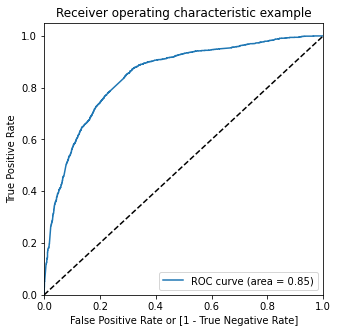

In [78]:
#Calling the draw_roc function with y_train_pred_final.Converted , y_train_pred_final.Conversion_Prob
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.85 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [79]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.395304,0,1,1,1,1,0,0,0,0,0,0
1,1,0.600625,1,1,1,1,1,1,1,1,0,0,0
2,1,0.170155,0,1,1,0,0,0,0,0,0,0,0
3,0,0.120193,0,1,1,0,0,0,0,0,0,0,0
4,1,0.870316,1,1,1,1,1,1,1,1,1,1,0


In [80]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.431402  1.000000  0.000000
0.1   0.1  0.520561  0.987868  0.166009
0.2   0.2  0.701495  0.918977  0.536489
0.3   0.3  0.760187  0.880416  0.668968
0.4   0.4  0.774953  0.772097  0.777120
0.5   0.5  0.768224  0.675910  0.838264
0.6   0.6  0.760748  0.596187  0.885602
0.7   0.7  0.726542  0.457972  0.930309
0.8   0.8  0.698318  0.351820  0.961210
0.9   0.9  0.633084  0.165511  0.987837


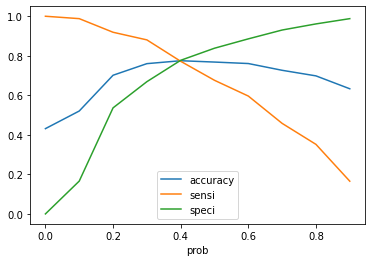

In [81]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.395304,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.600625,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.170155,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.120193,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.870316,1,1,1,1,1,1,1,1,1,1,0,1


In [83]:
# Checking the accuracy with 0.42 cutoff

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7755140186915888

In [84]:
# creating confusion matrix at 0.42 cutoff
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

print(confusion)



[[2409  633]
 [ 568 1740]]


In [85]:
# Evaluating the other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calculating Sensitivity

TP/(TP+FN)

0.7538994800693241

In [87]:
# Calculating Specificity

TN/(TN+FP)

0.7919132149901381

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [88]:
# Scaling the test set'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [89]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Unreachable,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7891,0.015936,0.464349,0,0,0,0,0,0,0,1,0,0,0,0,0
8510,0.015936,0.809859,0,0,0,0,0,0,0,0,0,0,0,1,0
7385,0.003984,0.609595,0,0,0,0,1,0,0,0,0,0,0,0,0
1063,0.007968,0.011444,0,0,0,0,0,0,0,0,0,0,0,0,0
4721,0.019920,0.046655,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [91]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Unreachable,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7891,1.0,0.015936,0.464349,0,0,0,0,0,0,0,1,0,0,0,0,0
8510,1.0,0.015936,0.809859,0,0,0,0,0,0,0,0,0,0,0,1,0
7385,1.0,0.003984,0.609595,0,0,0,0,1,0,0,0,0,0,0,0,0
1063,1.0,0.007968,0.011444,0,0,0,0,0,0,0,0,0,0,0,0,0
4721,1.0,0.019920,0.046655,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,1.0,0.019920,0.048415,0,0,0,0,0,0,0,0,0,0,0,0,0
6700,1.0,0.071713,0.105194,0,0,0,0,0,0,0,0,0,0,0,0,0
1743,1.0,0.007968,0.087588,0,0,0,0,0,0,0,0,0,0,0,0,0
1198,1.0,0.003984,0.105194,0,0,0,0,1,0,0,0,0,0,0,0,0


In [92]:
# Droping 'Last Notable Activity_Had a Phone Conversation from X_test as well
X_test.drop('Last Notable Activity_Had a Phone Conversation', 1,inplace = True)

In [93]:
# Making predictions on the test set and storing it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [94]:
y_test_pred[:10]

7891    0.233807
8510    0.947795
7385    0.422776
1063    0.121425
4721    0.147334
7686    0.360471
8445    0.699350
5812    0.873621
3241    0.772493
5425    0.400013
dtype: float64

In [95]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7891,0.233807
8510,0.947795
7385,0.422776
1063,0.121425
4721,0.147334


In [96]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [97]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [98]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.233807
1,1,0.947795
2,1,0.422776
3,1,0.121425
4,0,0.147334


In [99]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.233807
1,1,0.947795
2,1,0.422776
3,1,0.121425
4,0,0.147334


In [100]:
# Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.233807,0
1,1,0.947795,1
2,1,0.422776,1
3,1,0.121425,0
4,0,0.147334,0


In [101]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7836894897514174

In [102]:
#Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1041,  276],
       [ 220,  756]], dtype=int64)

In [103]:
#Evaluation metrics from confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Calculating sensitivity
TP / float(TP+FN)

0.7745901639344263

In [105]:
# Calculating specificity
TN / float(TN+FP)

0.7904328018223234

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [106]:
#Confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2550,  492],
       [ 748, 1560]], dtype=int64)

##### Precision
TP / TP + FP

In [107]:
#calculating Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7602339181286549

##### Recall
TP / TP + FN

In [108]:
#Calculating Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6759098786828422

### Precision and recall tradeoff

In [109]:
from sklearn.metrics import precision_recall_curve

In [110]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       1
        ..
 5345    0
 5346    0
 5347    0
 5348    0
 5349    1
 Name: Converted, Length: 5350, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5345    0
 5346    1
 5347    0
 5348    0
 5349    1
 Name: Predicted, Length: 5350, dtype: int64)

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

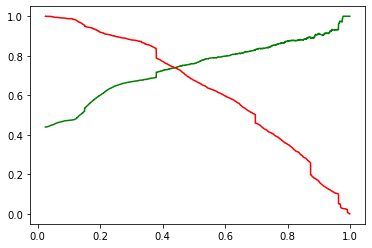

In [112]:
#Plotting precision vs Recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.395304,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.600625,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.170155,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.120193,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.870316,1,1,1,1,1,1,1,1,1,1,0,1


In [114]:
# checking accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7749532710280373

In [115]:
# creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2440,  602],
       [ 602, 1706]], dtype=int64)

In [116]:
# Evaluate the other metrics from confusion matrix

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Calculating Precision
TP/(TP+FP)

0.7391681109185442

In [118]:
# Calculating Recall
TP/(TP+FN)

0.7391681109185442

## Observations

The cutoff of 0.44 seems to be a good cutoff as it gives below evaluation metyrics on the train set

**accuracy - 77%**

**Precision - 73%**

**Recall - 73**

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [119]:
# Making predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

7891    0.233807
8510    0.947795
7385    0.422776
1063    0.121425
4721    0.147334
7686    0.360471
8445    0.699350
5812    0.873621
3241    0.772493
5425    0.400013
dtype: float64

In [120]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7891,0.233807
8510,0.947795
7385,0.422776
1063,0.121425
4721,0.147334


In [121]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [122]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.233807
1,1,0.947795
2,1,0.422776
3,1,0.121425
4,0,0.147334


In [124]:
# Renaming the column to 'Conversion_Prob'
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.233807
1,1,0.947795
2,1,0.422776
3,1,0.121425
4,0,0.147334


In [125]:
# Making predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.233807,0
1,1,0.947795,1
2,1,0.422776,0
3,1,0.121425,0
4,0,0.147334,0


In [126]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7867422590492804

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1068,  249],
       [ 240,  736]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Calculating Precision
TP/(TP+FP)

0.7472081218274111

In [130]:
# Calculating Recall
TP/(TP+FN)

0.7540983606557377

## Final Observation

Our Model has below provided metrics from the Precision and Recall view with the cutoff of .44 probability on the test set.

**Accuracy - 78.6%**

**Precision - 74.7%**

**Recall - 75.4%**

Our Model has below provided metrics from the specificity and sensitivity view with the cutoff of .42 probability on the test set.

**Accuracy - 78.3%**

**Specificity - 79%**

**Sensitivity - 77.4%**
